In [7]:
import os
import cv2
import numpy as np
import mediapipe as mp

from matplotlib import pyplot as plt
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [8]:
train_dataset_directory = os.path.join("..", "dataset", "try3", "archive", "asl_alphabet_train", "asl_alphabet_train")

In [9]:
# Create hand landmarks models
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                    num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

def get_hand_landmarks(img):
    # image = test_x[random_index].reshape(28, 28).astype(np.uint8)
    image = cv2.resize(img, (224, 224))
    gray_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
    detection_result = detector.detect(gray_frame)
    return detection_result

I0000 00:00:1700429812.113856  663785 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1700429812.139379  663867 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.54.03), renderer: NVIDIA RTX A6000/PCIe/SSE2


In [10]:
landmarks_json = {}

In [11]:
def process_img(image_path, landmarks_json):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detection_result = get_hand_landmarks(img)
    if len(detection_result.hand_landmarks) == 0:
        return False
    landmarks_json[image_path] = []
    for landmark in detection_result.hand_landmarks:
        for kp in landmark:
            landmarks_json[image_path].append([kp.x, kp.y, kp.z])
    return True

In [12]:
img_paths = []

for letter in os.listdir(train_dataset_directory):
    letter_directory = os.path.join(train_dataset_directory, letter)
    for image in os.listdir(letter_directory):
        image_path = os.path.join(letter_directory, image)
        img_paths.append(image_path)

print(len(img_paths))

87000


In [13]:
process_img(img_paths[0], landmarks_json)

True

In [14]:
print(len(landmarks_json))

1


In [15]:
success_rate = 0
fail_rate = 0
for i, image_path in enumerate(img_paths):
    success = process_img(image_path, landmarks_json)
    # print(f"Success: {success}")
    if success:
        success_rate += 1
    else:
        fail_rate += 1
    if i % 100 == 0:
        # print(f"Success rate: {success_rate}, Fail rate: {fail_rate}")
        print(f"Success rate: {success_rate / (success_rate + fail_rate) * 100:.2f}%")
        print(f"Fail rate: {fail_rate / (success_rate + fail_rate) * 100:.2f}%")
        print(f"Total: {i:.2f}")
        print(f"Percentage: {(i / len(img_paths)) * 100:.2f}%")


Success rate: 100.00%
Fail rate: 0.00%
Total: 0.00
Percentage: 0.00%
Success rate: 60.40%
Fail rate: 39.60%
Total: 100.00
Percentage: 0.11%
Success rate: 63.68%
Fail rate: 36.32%
Total: 200.00
Percentage: 0.23%


KeyboardInterrupt: 

https://www.kaggle.com/competitions/asl-fingerspelling/data

In [ ]:
print(len(landmarks_json))

64751


In [ ]:
import json
# write json with indentations
with open('hand_landmarks.json', 'w', encoding='utf-8') as f:
    json.dump(landmarks_json, f, indent=4)

In [ ]:
import json

In [ ]:
with open('hand_landmarks.json', encoding='utf-8') as f:
    data = json.load(f)

class_distribution = {}
for i, (image_path, landmarks) in enumerate(data.items()):
    # print(image_path)
    # print(landmarks)

    class_name = image_path.split(os.path.sep)[-2]
    if class_name not in class_distribution:
        class_distribution[class_name] = 0
    class_distribution[class_name] += 1

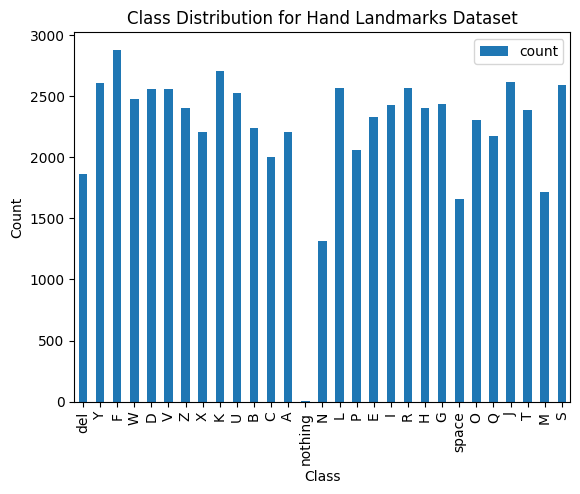

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['count'])
# plot histogram
df.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for Hand Landmarks Dataset")
plt.show()